In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("TRIAL 1 480.txt")

In [18]:
lams = sorted(np.array([500, 480, 450, 520, 530, 550, 575, 565, 540, 585, 600]))
lams = sorted(np.array([475, 500, 530, 540, 550, 575, 600, 620, 630, 650, 675]))
def get_inten(fn):
    # with open('TRIAL 1 ' + str(lamd) + '.txt') as f:
    with open(fn) as f:
        lines = f.readlines()
    start = lines.index('>>>>>Begin Spectral Data<<<<<\n')+1
    data = lines[start:]
    lam = np.array([float(data[i][:data[i].index("\t")]) for i in range(len(data))])
    inten = np.array([(data[i][data[i].index("\t")+1:data[i].index("\n")]) for i in range(len(data))])
    lam = lam[np.where(inten!='')].astype(np.float)
    inten = (inten[np.where(inten!='')].astype(np.float))
    plt.plot(lam, inten, 'r.')
    plt.title(f"Intensity vs. Wavelength for Slit at {fn}")
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Intensity (Photon Counts)")
    plt.show()

    index = np.where(inten == max(inten))[0][0]
    erri = np.std(inten[index-2:index+2])
    errl = np.std(lam[np.where(abs(inten)>0.5*max(inten))])
    return lam[index], inten[index], erri, errl

/var/folders/_7/x_mxrhfx0gq6pt61nr_x9t880000gn/T/ipykernel_8697/2702620319.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lam = lam[np.where(inten!='')].astype(np.float)
/var/folders/_7/x_mxrhfx0gq6pt61nr_x9t880000gn/T/ipykernel_8697/2702620319.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  inten = (inten[np.where(inten!='')].

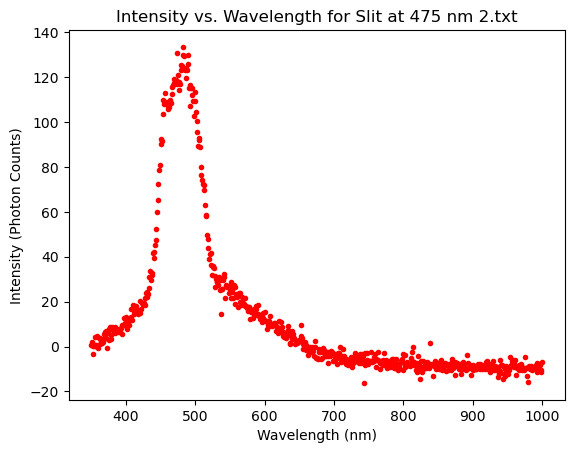

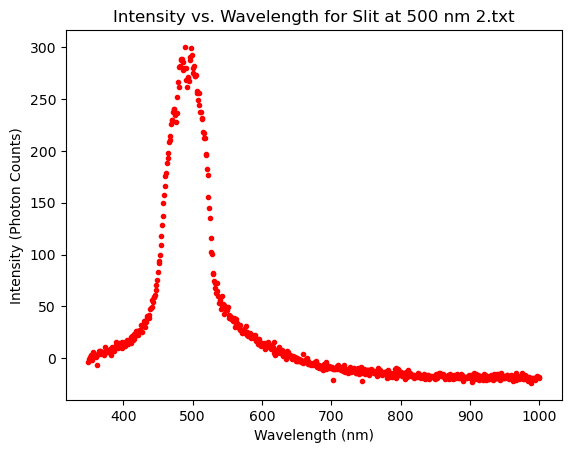

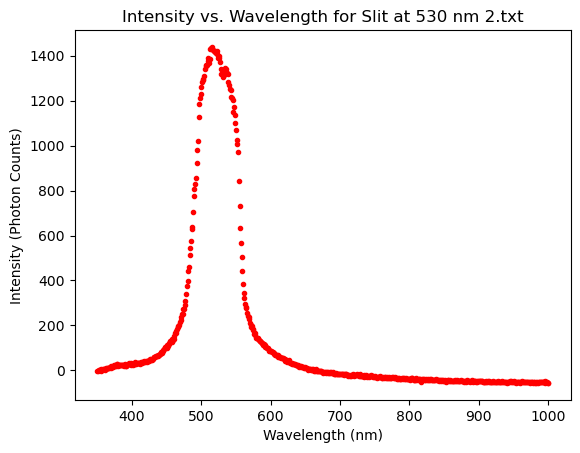

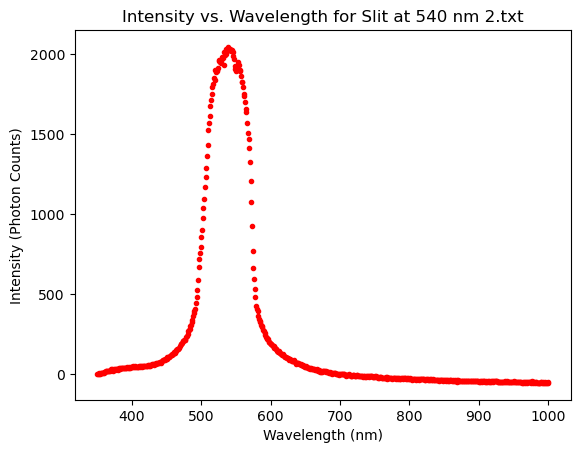

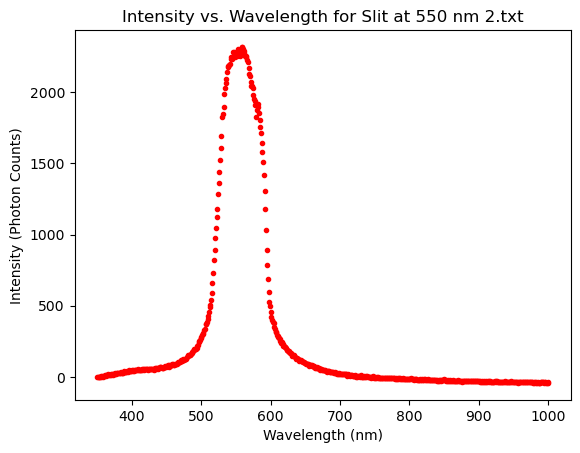

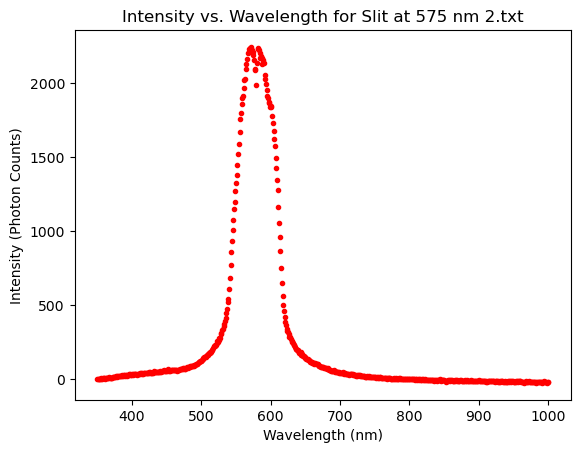

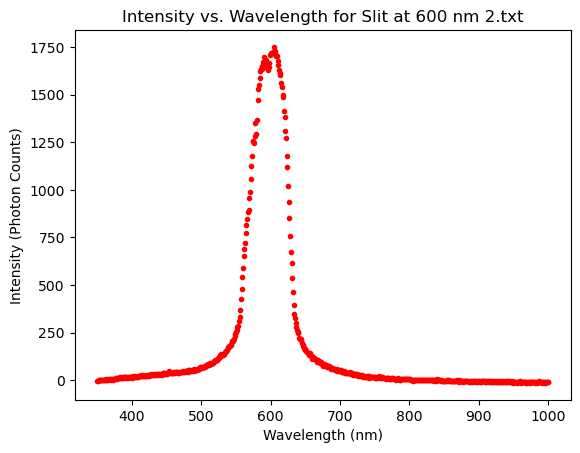

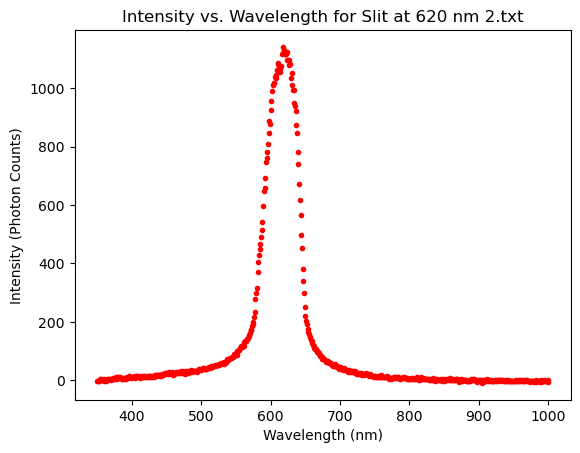

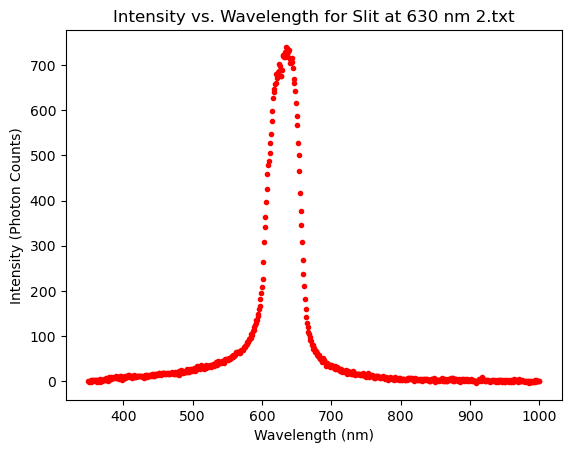

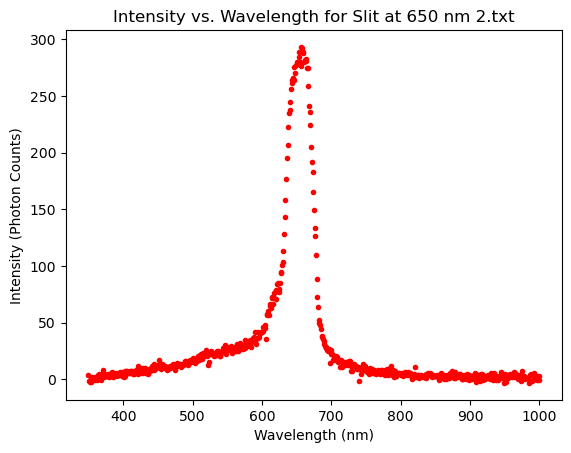

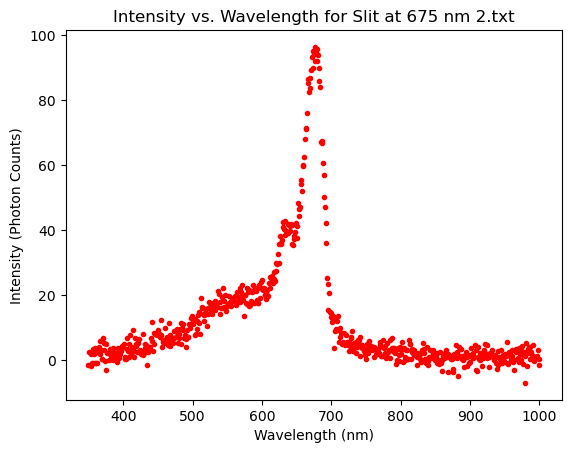

In [19]:
intensities = []
newlams = []
erri = []
errl = []
for lam in lams:
    getting = get_inten(str(lam) + ' nm 2.txt')
    intensities.append(getting[1])
    newlams.append(getting[0])
    errl.append(getting[2])
    erri.append(getting[3])

Text(0, 0.5, 'Flux (Photon Counts)')

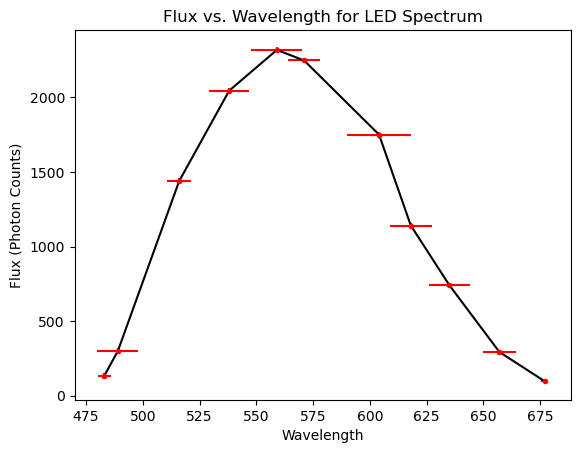

In [20]:
newlams, intensities = zip(*sorted(zip(newlams, intensities)))
plt.errorbar(newlams, intensities, xerr=errl, yerr=erri, fmt="r.")
plt.plot(newlams, intensities, "k")
plt.title("Flux vs. Wavelength for LED Spectrum")
plt.xlabel("Wavelength")
plt.ylabel("Flux (Photon Counts)")

In [21]:
from scipy import interpolate
f = interpolate.interp1d(np.transpose(np.array(newlams)), np.transpose(np.array(intensities)))

11 11


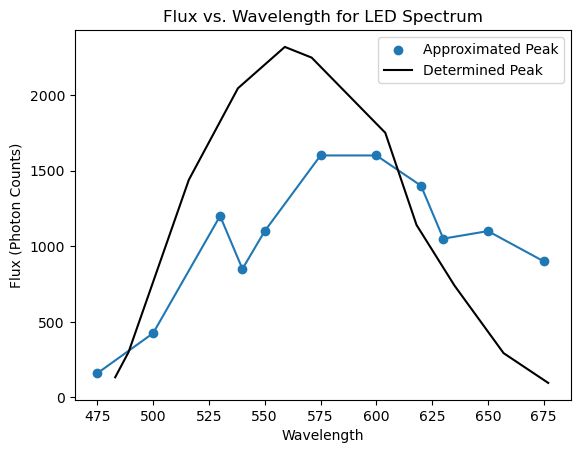

In [22]:
# Painstakingly manually looked at peaks in oceanview to make sure its roughly the same.
approx_inten = [160, 425, 1200, 850, 1100, 1600, 1600, 1400, 1050, 1100, 900]
print(len(lams), len(approx_inten))
plt.scatter(lams, approx_inten, label="Approximated Peak")
plt.plot(lams, approx_inten)
plt.plot(newlams, intensities, "k", label="Determined Peak")
plt.title("Flux vs. Wavelength for LED Spectrum")
plt.xlabel("Wavelength")
plt.ylabel("Flux (Photon Counts)")
plt.legend()

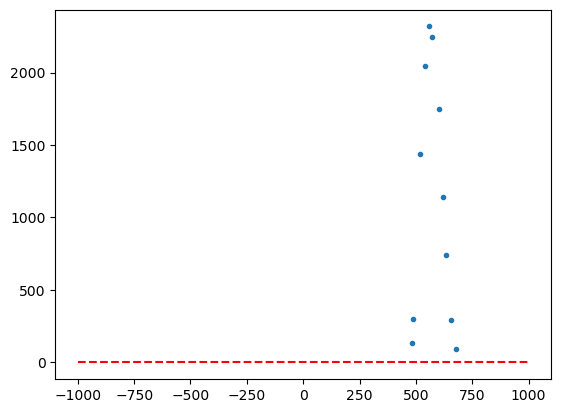

NameError: name 'func' is not defined

In [23]:
#Attempt to fit Planck's law for each calibration data

from scipy.optimize import curve_fit

#DEFINE DATASET
x = np.array(newlams)
y = np.array(intensities)
xerr = np.array(errl)
yerr = np.array(erri)

#DEFINE FITTING FUNCTIONS
def planck(x, a, b, c, d): # most general model
     return (a*(d*x+c)**-5)/(np.exp(b/(d*x+c))-1)
    
def planck_general(x, a, b, c, d): # strictly Planck's law (no lambda naught)
     return (a*(x)**-5)/(np.exp(b/(x))-1)

#LOOK AT FUNCTION PARAMETERS
xtest = np.linspace(-1000, 1000) # set an arbitrary xrange for Planck's Law

p0 = (6e-5, 0.01, 0, 0) # set initial values for the fitting function

plt.scatter(x, y,marker='.', label='Raw Data') # Look at the raw data
plt.plot(xtest, planck_general(xtest, *p0), 'r--',
          label='Manually Changing p0') # Look at the initial values for the fitting function
plt.show()


#NOW ACTUALLY DO THE FIT
popt, pcov = curve_fit(func, x, y,sigma=(yerr**2+xerr**2)**0.5, p0=p0) # fit for best curve with curve_fit

plt.scatter(x, y,marker='.', label='Raw Data')
plt.plot(xtest, planck_general(xtest, *popt), 'r--',
          label='Best Fit')
plt.title("Exponential Fit to Temperature vs. Time data for Brass Can")
plt.xlabel("Time (s)")
plt.ylabel("Temperature (Kelvin)")
print(popt)
np.sum((func(x, *popt) - y)**2/y)

In [24]:
# Load Full Blackbody Data
def get_inten(fn):
    print(fn)
    with open(fn) as f:
        lines = f.readlines()
    start = lines.index('>>>>>Begin Spectral Data<<<<<\n')+1
    data = lines[start:]
    lam = np.array([float(data[i][:data[i].index("\t")]) for i in range(len(data))])
    inten = np.array([(data[i][data[i].index("\t")+1:data[i].index("\n")]) for i in range(len(data))])
    lam = lam[np.where(inten!='')].astype(np.float)
    inten = (inten[np.where(inten!='')].astype(np.float))
    plt.plot(lam, inten, 'r.')
    plt.show()

    index = np.where(inten == max(inten))[0][0]
    print(index)
    erri = np.std(inten[index-2:index+2])
    errl = np.std(lam[np.where(abs(inten)>0.5*max(inten))])
    print(erri, errl)
    return lam, inten, errl, erri

blackbody test1.txt


/var/folders/_7/x_mxrhfx0gq6pt61nr_x9t880000gn/T/ipykernel_8697/160525332.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lam = lam[np.where(inten!='')].astype(np.float)
/var/folders/_7/x_mxrhfx0gq6pt61nr_x9t880000gn/T/ipykernel_8697/160525332.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  inten = (inten[np.where(inten!='')].as

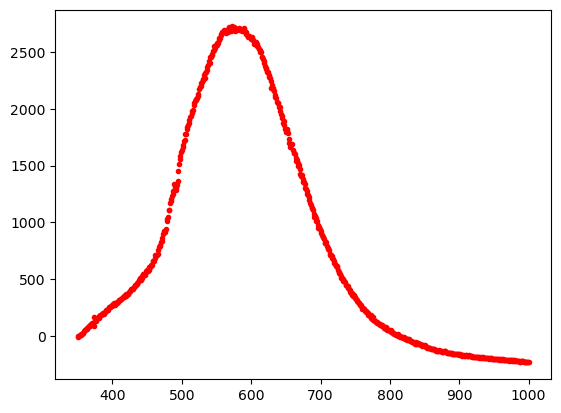

223
13.752749497827713 52.24940191045253


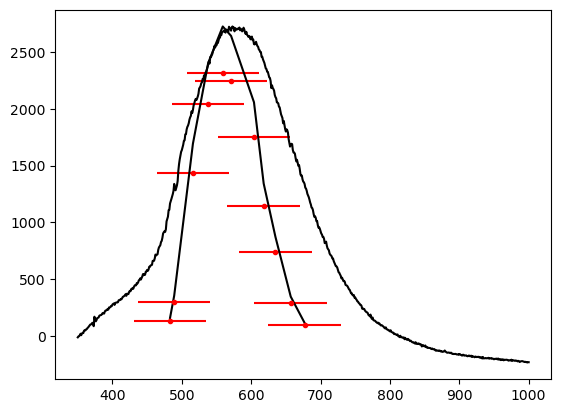

In [27]:
lam, inten, errl, erri = get_inten("blackbody test1.txt") # First spectrum
# Plot it on top of our calibration data
ratio = max(inten)/max(intensities)

# Looking at the two spectra on top of each other.
plt.errorbar(newlams, intensities, xerr=errl, yerr=erri, fmt="r.")

plt.plot(newlams, np.array(intensities)*ratio, "k")
plt.plot(lam, inten, "k")

1.0 559.0 31.7504473841064


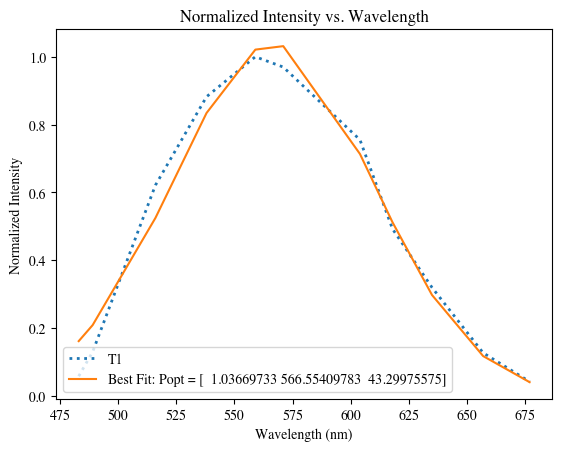

In [35]:
# These look very different. I think this is because we lose some light on reflection from the diffraction grating 
# and Kohler illumination.
# I think we should fit a gaussian to Sophie's calibration data because Planck's Law makes my head hurt:

x = np.array(newlams)
y = np.array(intensities)

y = y/max(y) # normalize y values
# Gaussian Function
def gaussian(x, a, b, c):
    
    return a*np.exp((-1*(x-b)**2)/(2*c**2))

# Initial Fit Parameters
a = max(y)
b = float(x[np.where(y==a)])
c = np.std(x)/2

print(a, b, c)

# Plotting raw data
plt.plot(x, y, ':', lw=2, label='T1')


#Run Fit
popt, pcov = curve_fit(gaussian, x, y, p0=(a, b, c))
ybest = gaussian(x, *popt)

# Plotting Best Fit
plt.plot(x, ybest, label=f'Best Fit: Popt = {popt}')
plt.legend()

font = {'family' : 'times',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)

plt.title("Normalized Intensity vs. Wavelength")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Normalized Intensity")

plt.show()

with open("sophie_calibration_params.txt", "w") as text_file:
    text_file.write(str(popt))

/var/folders/1r/gfllt6vs67s0lxpdz5vp7rn40000gn/T/ipykernel_9281/1433925589.py:9: RuntimeWarning: overflow encountered in exp
  return (a*(d*x + c)**-5)/(np.exp(b/(d*x + c))-1)


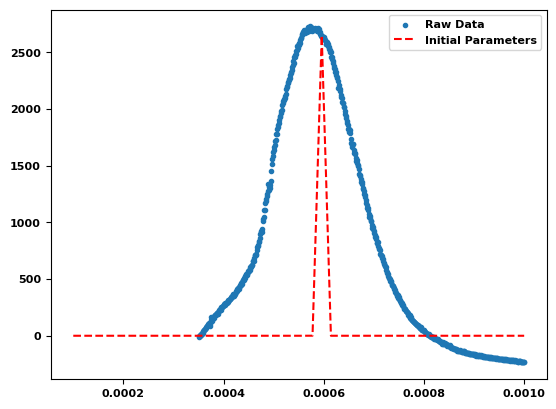

/var/folders/1r/gfllt6vs67s0lxpdz5vp7rn40000gn/T/ipykernel_9281/2095647653.py:16: RuntimeWarning: overflow encountered in exp
  return (a*(x)**-5)/(np.exp(b/(x))-1)


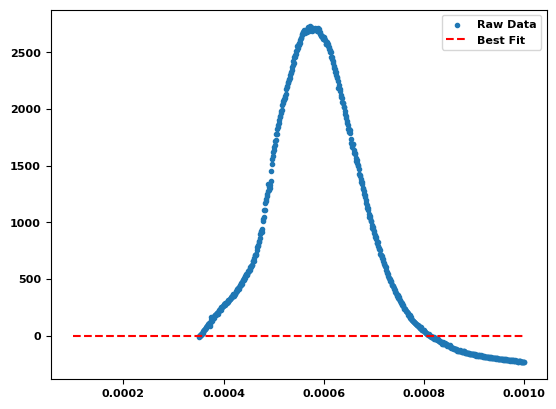

In [149]:
from scipy.optimize import curve_fit

#FITTING FULL LED SPECTRUM WITH PLANCK'S LAW

x = np.array(lam/1e6) # change to micrometers (which is what Planck's Law is in)
y = np.array(inten)
    
def planck_general(x, a, b, c, d): # redefine planck_general from before
     return (a*(d*x + c)**-5)/(np.exp(b/(d*x + c))-1)

xtest = np.linspace(0.0001, 0.001) # Set up some initial xrange for the best fit

p0 = (3e-24, 1, -0.0006, 1) # initial parameters for fit
plt.scatter(x, y,marker='.', label='Raw Data')
plt.plot(xtest, planck_general(xtest, *p0), 'r--',
          label='Initial Parameters') 
plt.legend()
plt.show()


#ACTUALLY RUN THE FIT. I noticed that scipy doesn't converge to anything beter than p0.
# I think this might be because small changes in d cause seemingly volatile changes in the curve.
# Probably d should be 1.

popt, pcov = curve_fit(func2, x, y, p0=p0)

plt.scatter(x, y,marker='.', label='Raw Data')
plt.plot(xtest, func2(xtest, *popt), 'r--',
          label='Best Fit')
plt.legend()

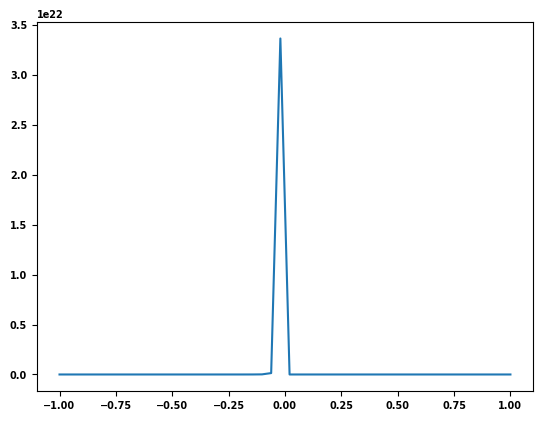

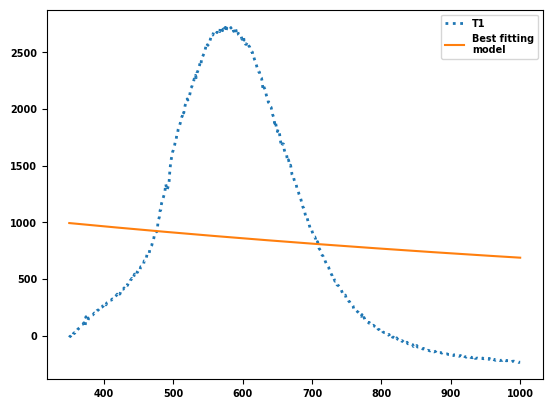

In [203]:
#NOW TRYING THE INTERNET'S SOLUTION: https://python4esac.github.io/fitting/example_blackbody.html

#Redefine datasets
x = np.array(lam)
y = np.array(inten)

# Define an actual Planck's law function
def blackbody_lam(lam, T, d):
    from scipy.constants import h,k,c
    lam = 1e-6 * lam # convert to metres
    return 2*h*c**2 / ((lam+d)**5 * (np.exp(h*c / ((lam+d)*k*T)) - 1))

# Plot some fake data to test
xtest = np.linspace(-1, 1)
plt.plot(xtest, blackbody_lam(xtest, 10000, 0))
plt.show()

# Plot the raw data
plt.plot(x, y, ':', lw=2, label='T1')
poptinit = (1e10, 0.00000001)

# Actually Do the Fit
popt, pcov = curve_fit(blackbody_lam, x, y, p0=poptinit)

# Get Best Fit Parameters
bestT1, d = popt
sigmaT1 = np.sqrt(np.diag(pcov))

ybest = blackbody_lam(x, *popt)

#plot solution
plt.plot(x, ybest, label='Best fitting\nmodel')
plt.legend()
plt.show()

1.0 573.0 93.96364545219957


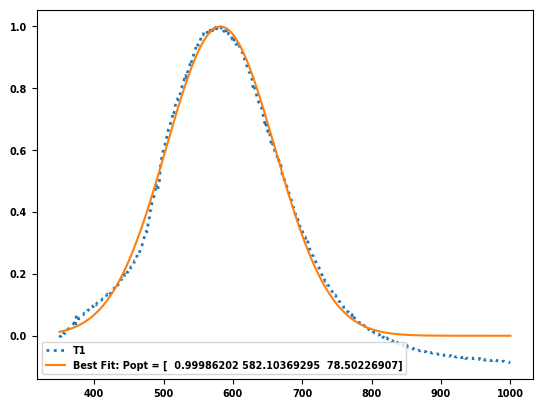

In [204]:
#irdk what's going on. Trying a gaussian fit.
y = y/max(y) # normalize y values
# Gaussian Function
def gaussian(x, a, b, c):
    
    return a*np.exp((-1*(x-b)**2)/(2*c**2))

# Initial Fit Parameters
a = max(y)
b = float(x[np.where(y==a)])
c = np.std(x)/2

print(a, b, c)

# Plotting raw data
plt.plot(x, y, ':', lw=2, label='T1')


#Run Fit
popt, pcov = curve_fit(gaussian, x, y, p0=(a, b, c))
ybest = gaussian(x, *popt)

# Plotting Best Fit
plt.plot(x, ybest, label=f'Best Fit: Popt = {popt}')
plt.legend()

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 7}

plt.rc('font', **font)
plt.show()

In [205]:
popt

array([  0.99986202, 582.10369295,  78.50226907])

In [ ]:
# Trying a gaussian fit on our previous calibration.

#irdk what's going on. Trying a gaussian fit.
y = y/max(y) # normalize y values
# Gaussian Function
def gaussian(x, a, b, c):
    
    return a*np.exp((-1*(x-b)**2)/(2*c**2))

# Initial Fit Parameters
a = max(y)
b = float(x[np.where(y==a)])
c = np.std(x)/2

print(a, b, c)

# Plotting raw data
plt.plot(x, y, ':', lw=2, label='T1')


#Run Fit
popt, pcov = curve_fit(gaussian, x, y, p0=(a, b, c))
ybest = gaussian(x, *popt)

# Plotting Best Fit
plt.plot(x, ybest, label=f'Best Fit: Popt = {popt}')
plt.legend()

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 7}

plt.rc('font', **font)
plt.show()